<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Motores Zaber: Tutorial </font>
</div>

- **Para**: Puesta en marcha de Motorized rotary stage [RSW60C-E03T3A-MC10T3]. Zaber ( https://www.zaber.com )

- **Fecha**: 2023/06/30
        
    
- **Objetivos**: Comprobar el funcionamiento de los motores

- **Descripción** - 

- **Referencias**: 
    - https://www.zaber.com
    - https://www.zaber.com/software
    - https://software.zaber.com/motion-library/docs

- **Documentación**
    - Página web: https://www.zaber.com/manuals/RSW-E
    - Manual: https://www.zaber.com/ufs/PdfsStore/r77PhKRpxRm8qQyvo/X-Series-Getting-started-guide.pdf
    - API reference: https://software.zaber.com/motion-library/api/py

- **Autores**: 
    - Luis Miguel Sánchez Brea

# Introducción

Tutorial de uso de los motores de Zaber. Son 4 motores rotatorios, con codificador. 

 <figure>
  <img src="RSW-E.jpg" alt="aocg" style="width:5cm">
  <figcaption>Fig.1 Fotografía de los motores.</figcaption>
</figure> 

Existen varios procedimientos para programar los motores. 
- ASCII, que son las funciones normales
- BINARY, que se programa mediante 
- GCODE que es directamente código máquina.

El software es muy completo. Como ejemplo, vemos los elementos a los que  se puede acceder:
-  AlertEvent
-  AllAxes
-  Axis
-  AxisIdentity
-  AxisSettings
-  AxisStorage
-  AxisType
-  CanSetStateAxisResponse
-  CanSetStateDeviceResponse
-  Connection
-  ConversionFactor
-  Device
-  DeviceIdentity
-  DeviceIO
-  DeviceIOInfo
-  DeviceSettings
-  DeviceStorage
-  IoPortType
-  Lockstep
-  LockstepAxes
-  MessageType
-  Oscilloscope
-  OscilloscopeCaptureProperties
-  OscilloscopeData
-  OscilloscopeDataSource
-  ParamsetInfo
-  PidTuning
-  PvtAxisDefinition
-  PvtAxisType
-  PvtBuffer
-  PvtMode
-  PvtSequence
-  Response
-  ServoTuner
-  ServoTuningParam
-  ServoTuningParamset
-  SettingConstants
-  SimpleTuningParamDefinition
-  Stream
-  StreamAxisDefinition
-  StreamAxisType
-  StreamBuffer
-  StreamMode
-  Transport
-  UnknownResponseEvent
-  WarningFlags
-  Warningsp

Las funciones vienen en https://software.zaber.com/motion-library/api/py/ascii

## Detección puertos


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import time

Muchas veces no se sabe bien en que puerto estamos. Por ello, tenemos en py_labs una función que nos indica los puertos que están activos. 

In [3]:
from py_lab.utils import List_COM_Ports, List_USB_Devices

In [4]:
List_COM_Ports(verbose=True)

/dev/ttyACM0 - X-MCC2


Si estamos en Windows será algo así como COM3 mientras que en linux tiene la forma /dev/ttyACM0. En cualquier caso, este nombre es el que hay que utilizar cuando pida el puerto.

También se pueden obtener propiedades de los puertos:

In [5]:
List_USB_Devices(verbose=True)

DEVICE ID 1d6b:0003 on Bus 008 Address 001 =================
 bLength                :   0x12 (18 bytes)
 bDescriptorType        :    0x1 Device
 bcdUSB                 :  0x300 USB 3.0
 bDeviceClass           :    0x9 Hub
 bDeviceSubClass        :    0x0
 bDeviceProtocol        :    0x3
 bMaxPacketSize0        :    0x9 (9 bytes)
 idVendor               : 0x1d6b
 idProduct              : 0x0003
 bcdDevice              :  0x519 Device 5.19
 iManufacturer          :    0x3 Error Accessing String
 iProduct               :    0x2 Error Accessing String
 iSerialNumber          :    0x1 Error Accessing String
 bNumConfigurations     :    0x1
  CONFIGURATION 1: 0 mA ====================================
   bLength              :    0x9 (9 bytes)
   bDescriptorType      :    0x2 Configuration
   wTotalLength         :   0x1f (31 bytes)
   bNumInterfaces       :    0x1
   bConfigurationValue  :    0x1
   iConfiguration       :    0x0 
   bmAttributes         :   0xe0 Self Powered, Remote Wakeup


- # Conexión de los motores

Lo primero a realizar es cargar las librerías.


https://software.zaber.com/motion-library/docs/tutorials/code

In [6]:
from zaber_motion import Units
from zaber_motion.ascii import Connection
from zaber_motion.measurement import Measurement


<div class="alert alert-block alert-success">
    
<b>Nota:</b>
    
Si hay problemas con los puertos suele ser que no se tenga acceso:
    
    - Cannot open serial port: open /dev/ttyUSB0: permission denied

En este caso, hay que dar acceso al puerto:

    - sudo adduser $USER dialout    

Ver más en https://software.zaber.com/motion-library/docs/tutorials/code
</div>



<div class="alert alert-block alert-info">

<b>Consejos:</b>
    
En https://software.zaber.com/motion-library/docs/tutorials/install/py se puede encontrar el procedimiento de instalación de la librería. Es como siempre, pero conviente actualizarla:

    - pip3 install --user zaber-motion
    - sudo apt install python3 python3-pip
    - sudo -H pip3 install --upgrade pip
    - pip3 install --user --upgrade zaber-motion

En la fecha de la adquisición, la versión era 4.2.0.
    

</div>

**Conexión**

In [7]:
connection=Connection.open_serial_port("/dev/ttyACM0")


In [8]:
# Habilitar alertas
connection.enable_alerts()


In [9]:
# Ver cuántos se han obtenido
device_list = connection.detect_devices()
print("Found {} devices".format(len(device_list)))


Found 1 devices


In [10]:
device = device_list[0]
print(device)

Device 1 SN: 115183 (X-MCC2 (rev 2)) -> Connection 1 (ASCII Serial port: /dev/ttyACM0)


En el caso del ejemplo tengo instalados dos ejes. Para acceder a cada uno de ellos:

In [11]:
axis1=device.get_axis(1)
axis2=device.get_axis(2)

print(axis1)
print(axis2)


Axis 1 (RSW60C-E03T3A) -> Device 1 SN: 115183 (X-MCC2 (rev 2)) -> Connection 1 (ASCII Serial port: /dev/ttyACM0)
Axis 2 (RSW60C-E03T3A) -> Device 1 SN: 115183 (X-MCC2 (rev 2)) -> Connection 1 (ASCII Serial port: /dev/ttyACM0)


Lo primero es hacer un homming:

In [12]:
all_axes = device.all_axes
all_axes.home()

In [13]:
if not axis1.is_homed():
    axis1.home()
    
if not axis2.is_homed():
    axis2.home()

In [14]:
print(axis1.is_homed(), all_axes.is_homed())

True True


Y ahora ya se pueden hacer movimientos, que pueden ser relativos y absolutos. En cuanto a las unidades es conveniente incluirlas (formato físicos), y tenemos en grados y radianes:

In [15]:
# Mover a 90 grados
axis1.move_absolute(90, Units.ANGLE_DEGREES)

# Move by an additional 5mm
axis2.move_relative(1, Units.ANGLE_RADIANS)

También tenemos las unidades *Units.NATIVE*, que creo que son micropulsos.

https://www.zaber.com/protocol-manual#topic_physical_units

In [16]:
print(axis1.get_position(Units.ANGLE_DEGREES))
print(axis1.get_position(Units.ANGLE_RADIANS))
print(axis1.get_position(Units.NATIVE))

89.99999999982
1.570796326791755
96000.0


Para saber la distancia de 1 micropulso:


In [17]:
pos0 = axis1.get_position(Units.ANGLE_DEGREES)
axis1.move_relative(1, Units.NATIVE)
pos1 = axis1.get_position(Units.ANGLE_DEGREES)
diferencia = pos1-pos0
print("Diferencia = {}º".format(diferencia))

Diferencia = 0.0009374999999920419º


In [18]:
print(axis1.identity)

print(axis1.settings)

{'_peripheral_id': 70104, '_peripheral_name': 'RSW60C-E03T3A', '_is_peripheral': True, '_axis_type': <AxisType.ROTARY: 2>, '_is_modified': False}


## Velocidad y aceleración

Cada movimiento se puede establecer con una velocidad y aceleración:

In [19]:
axis1.move_absolute(45, unit = Units.ANGLE_DEGREES, wait_until_idle = True, 
                    velocity = 10, velocity_unit = Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND, 
                    acceleration = 0, acceleration_unit = Units.NATIVE)

In [25]:
axis1.move_relative(600, unit = Units.ANGLE_DEGREES, wait_until_idle = False, 
                    velocity = 600, velocity_unit = Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND, 
                    acceleration = 0, acceleration_unit = Units.NATIVE)

también se puede establecer para referencia

In [26]:
print(axis1.get_state())

{"context":{"v":2,"type":"peripheral","fw":{"major":7,"minor":32,"build":13718}},"axis":{"peripheralId":"70104","serial":"116245","settings":{"cloop.continuous.enable":"0","cloop.displace.tolerance":"128","cloop.enable":"1","cloop.recovery.enable":"0","cloop.stall.action":"0","cloop.stall.detect.mode":"0","cloop.stall.tolerance":"512","cloop.timeout":"100","driver.current.hold":"25","driver.current.run":"50","ictrl.advance.a":"0.000000000","ictrl.advance.offset":"4096.000000000","ictrl.afcff.inductance":"0.063999996","ictrl.afcff.ke":"3.319047936","ictrl.afcff.ki":"0.000000000","ictrl.afcff.max":"48000.000851968","ictrl.afcff.ss":"0.000000000","ictrl.afcff.ss.max":"0.999899968","ictrl.ff.kd":"0.063999996","ictrl.ff.kp":"0.002050000","ictrl.gain.coldmult":"0.299999968","ictrl.pi.ki":"0.000010000","ictrl.pi.kp":"0.010000000","ictrl.type":"6","knob.dir":"0","knob.distance":"640","knob.enable":"1","knob.maxspeed":"700000","knob.mode":"1","knob.speedprofile":"2","limit.approach.maxspeed":"9

Se puede mover a una cierta velocidad, devuelve el control y se para posteriormente

In [41]:
axis1.move_velocity(10, unit='deg/s')
print(axis1.is_busy())
# time.sleep(10)
# axis1.stop()

True


In [ ]:
axis1.stop()

### stop

Para el motor

In [47]:
axis1.stop(wait_until_idle=True)


## otras cosas

### Is_busy

Comprueba si los ejes se estan movimiendo. Es mejor utilizarlo con all_axes

In [31]:
print(axis1.is_busy())

True


### park y unpark

Hace que un eje no esté disponible para el movimiento

In [34]:
axis1.park()
axis1.move_relative(1, Units.ANGLE_DEGREES)
#esto ahora da un error


CommandFailedException: CommandFailedException: Command "move rel 1067" rejected: PARKED: Unknown reply. Please see the documentation.

In [35]:
#Ahora se vuelve a poder utilizar
axis1.unpark()
axis1.move_relative(1, Units.ANGLE_DEGREES)



## All axis
Actúa sobre los dos ejes

In [ ]:
all_axes = device.all_axes

Actua de forma sincornizada, es decir, no hay el eje1 primero y el 2 despues, sino que lo hace a la vez:

In [ ]:
all_axes.home()

In [ ]:
# Waits until all axes of device stop moving.
all_axes.wait_until_idle(throw_error_on_fault = True)


## Settings

In [36]:
axis1_settings = axis1.settings

In [46]:
print(axis1_settings.get('pos', unit=Units.ANGLE_DEGREES))
print(axis1_settings.get('encoder.pos', unit='deg'))
print(axis1_settings.get('vel',unit=Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND))
print(axis1_settings.get('encoder.vel',unit=Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND))


4352.026874991296
4352.024999991296
9.999847412089375
9.37499999998125


## Movimientos sincronizados





Esto produce movimientos consecutivos, pero no sincronizados

wait_until_idle: Determines whether function should return after the movement is finished or just started.


In [48]:
axis1.move_relative(1, Units.ANGLE_RADIANS)
axis2.move_relative(1, Units.ANGLE_RADIANS)

Para poder tener movimientos que empiecen a la vez. Al ir a la misma velocidad uno acaba antes que el otro

In [50]:
axis1.move_relative(45, Units.ANGLE_DEGREES, wait_until_idle = False)
axis2.move_relative(90, Units.ANGLE_DEGREES, wait_until_idle = False)

Realmente sincronizados:

In [51]:
point1 = Measurement(0, Units.ANGLE_DEGREES)
point2 = Measurement(100, Units.ANGLE_DEGREES)

In [31]:
stream.disable()

In [52]:
stream = device.get_stream(1)
stream.setup_live(1,2)


In [53]:

stream.line_absolute_on((0,1),(point1,point2))



In [54]:
response=device.generic_command("stream 1 setup live 1 2")


CommandFailedException: CommandFailedException: Command "stream 1 setup live 1 2" rejected: BADDATA: The command's data was incorrect or out of range.

In [55]:
response=device.generic_command("stream 1 on a b circle abs cw 10000 12000")


In [58]:
response=device.generic_command("stream 1 on a b line rel 100000 100000")

 ## Para saber más:

 Autofocus de un microscopio: https://www.zaber.com/articles/autofocus-example

## Channel


https://www.zaber.com/articles/controller-scope

In [59]:
import time

In [60]:
# Configure the scope
scope = device.oscilloscope
scope.clear()
scope.add_channel(1, "pos")
scope.add_channel(1, "encoder.pos")
scope.add_channel(1, "vel")
scope.add_channel(1, "encoder.vel")

scope.set_timebase(0.1, unit='s')

# Start a move on axis 1 and begin capturing position information. 
# Then wait for the motion to end before reading the scope data.
axis1 = device.get_axis(1)
axis1.move_absolute(360, unit=Units.ANGLE_DEGREES, 
                    velocity=36, velocity_unit=Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND,
                    wait_until_idle=False)

scope.start()
time.sleep(10)

scope.stop()
axis1.stop()
channels = scope.read()
pos_data_points = channels[0].get_data(Units.ANGLE_DEGREES)
encoder_pos_data_points = channels[1].get_data(Units.ANGLE_DEGREES)
vel_data_points = channels[2].get_data(Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND)
encoder_vel_data_points = channels[3].get_data(Units.ANGULAR_VELOCITY_DEGREES_PER_SECOND)

scope.clear()


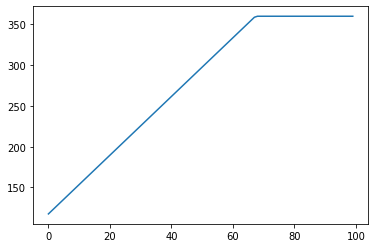

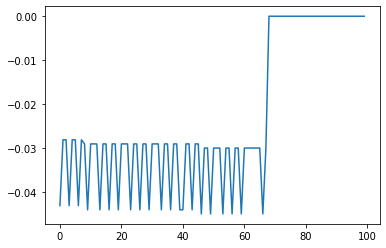

In [61]:
pos_data_points=np.array(pos_data_points)
encoder_pos_data_points=np.array(encoder_pos_data_points)
vel_data_points=np.array(vel_data_points)
encoder_vel_data_points=np.array(encoder_vel_data_points)

plt.figure()
plt.plot(pos_data_points)
plt.figure()
plt.plot(encoder_pos_data_points-pos_data_points)
plt.figure()
plt.plot(vel_data_points-encoder_vel_data_points)


In [69]:
axis1.stop()

## ASCII

https://www.zaber.com/articles/ascii-protocol

The ASCII protocol supports a wide range of useful commands to easily control the behaviour of the device, including:

- move commands: 
    Start basic motion
- io commands: 
    Configure digital and/or analog inputs and outputs
- stream commands: 
    Configure queued sequences of commands and coordinate multi-axis motion
- trigger commands: 
    Configure automatic actions to specific events
- get and set commands: 
    Configure device settings

Aquí vienen los comandos:
- https://www.zaber.com/protocol-manual?protocol=ASCII#topic_settings

- https://www.zaber.com/protocol-manual?protocol=ASCII#topic_command_io

In [62]:
axis1.generic_command('home')
axis2.generic_command("home")

In [63]:

axis1.generic_command("move rel 10000")
axis2.generic_command("move rel 20000")



In [64]:
max_speed= axis1.generic_command("get maxspeed")
print(max_speed.data)


92160


In [50]:
max_speed= axis1.generic_command("get maxspeed")
print(max_speed.data)

92160


In [67]:

axis1.generic_command("move rel 10000")
axis2.generic_command("move rel 20000")



In [72]:
device.generic_command_async("lamp on 2500")
1 


In [73]:
device.generic_command_async("lamp off")


In [74]:
## Aquí se mira cuál es el voltaje en un cierto puerto

response=device.generic_command("io get ai 1")

print(response.data)


#llemos todos los puertos
response=device.generic_command("io get ai")

print(response.data)


#puerto digital
response=device.generic_command("io get di 1")

print(response.data)


#leemos todos los puertos
response=device.generic_command("io get do port")
print(response.data)


11.676
11.678 11.420 11.578 11.699
0
0 0 0 0


In [75]:
response=device.generic_command("io set ao 1 3.3")

response=device.generic_command("io get ao")
print(response.data)



3.299


In [77]:
response=device.generic_command("io set do 3 1")

#leemos todos los puertos
response=device.generic_command("io get do port")
print(response.data)

0 1 1 0


## Stream

Movimientos sincornizados: line,circle, arc, helix



In [78]:
# este no tiene mucho sentido con los encoderes rotatorios

response=device.generic_command("stream 1 setup live 1 2")
response=device.generic_command("stream 1 on a b circle abs cw 10000 12000")
response=device.generic_command("stream 1 on a b line rel 2000 100000")


Para nosotros los movimientos a realizar son line. Pues hace que los motores inicien y acaben al mismo tiempo

In [79]:
# Movimiento sincronizado
# Axis 1 and 2 move to position (10000, 5000)
# Puede ser absoluto o relativo

response=device.generic_command("stream 1 on a b line rel 2000 100000")


### Trigger

#### Movimiento continuo entre dos posiciones

Use two triggers to continuously move axis 1 between two positions, 30,000 and 50,000:

https://www.zaber.com/articles/using-triggers-to-simplify-automation

In [80]:
# First configure the conditions that the triggers will fire under:

device.generic_command("trigger 1 when 1 pos >= 50000")
device.generic_command("trigger 2 when 1 pos <= 30000")

# Then configure the actions that will occur when the triggers fire:

device.generic_command("trigger 1 action a 1 move abs 30000")
device.generic_command("trigger 2 action a 1 move abs 50000")

# Finally, enable the triggers:

device.generic_command("trigger 1 enable")
device.generic_command("trigger 2 enable")


In [81]:
device.generic_command("trigger 1 disable")
device.generic_command("trigger 2 disable")

#### Moving when a trigger fires

Aquí se activa por tiempo

In [82]:
# Configure axis 1 of the device to move forward a distance of 10,000, relative to the current position, when trigger 3 fires:

device.generic_command("trigger 3 action a 1 move rel 10000")
device.generic_command("trigger 3 enable")

#activar por tiempo (en ms)
device.generic_command("trigger 3 when time 2000")

In [83]:
# cuando ya te canses de ver como se mueve, pues 
device.generic_command("trigger 3 disable")


##  Aquí se acaba todo señores


In [31]:
connection.close()